
Graphs are default Un-directed

DiGraphs are Directed Graphs

Multi-Graphs are those which have nodes, having multiple connectivity

Multi-di-graphs are those which have multiple connectivity & directed 

In [1]:
import logging

netlog = logging.getLogger('netlog')
netlog.setLevel(logging.INFO)
handler = logging.StreamHandler()
handler.setLevel(logging.WARNING)
netfrm = logging.Formatter(fmt='%(message)s')
handler.setFormatter(netfrm)
netlog.addHandler(handler)

In [3]:
import networkx as nx 
G = nx.Graph() # can be DiGraph, MultiGraph, MultiDiGraph
# Nodes has to be hashable object

In [3]:
# Add a single node
G.add_node(1)

# Add multiple node from a list

G.add_nodes_from([5,'78'])

In [4]:
G.add_nodes_from([
    (3, {"color":"red"}),
    (5, {'color':'green'})
])

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)
# G contains all nodes of H / use Graph H as node in G.  This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more.

In [6]:
G.add_node(H)

An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415}).

In [7]:
G.add_edges_from([(1, 2), (1, 3)])

In [8]:
G.add_edges_from(H.edges)

In [9]:
G.number_of_edges()

10

In [10]:
G.number_of_nodes()

12

In [15]:
# Creating DiGraph

DG = nx.DiGraph()
DG.add_edge(2, 1)  # adds the nodes in the order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)

assert list(DG.successors(2)) == [1, 4]
print(list(DG.successors(1)))  # == [3, 2]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

[3, 2]


basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree

In [16]:
list(G.nodes)

[1,
 5,
 '78',
 3,
 0,
 2,
 4,
 6,
 7,
 8,
 9,

In [17]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 0),
 (5, 4),
 (5, 6),
 (3, 2),
 (3, 4),
 (6, 7),
 (7, 8),
 (8, 9)]

In [18]:
list(DG.nodes)

[2, 1, 3, 4]

In [25]:
list(DG.adj[2])  # This is not like list index. 2 is a node inside the DG. 1, 4 are the adj nodes

[1, 4]

In [26]:
DG.degree([2,3])

DiDegreeView({2: 3, 3: 1})

In [19]:
list(DG.edges)

[(2, 1), (2, 4), (1, 3), (1, 2)]

In [20]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), (2, 3)])

In [27]:
G.remove_edge(1,2)

In [28]:
G.edges()

EdgeView([(1, 3), (1, 0), (5, 4), (5, 6), (3, 2), (3, 4), (6, 7), (7, 8), (8, 9)])

In [29]:
G.remove_node(1)

In [30]:
G.edges()

EdgeView([(5, 4), (5, 6), (3, 2), (3, 4), (6, 7), (7, 8), (8, 9)])

In [32]:
G.remove_nodes_from([6, 7])

In [33]:
G.edges()

EdgeView([(5, 4), (3, 2), (3, 4), (8, 9)])

In [34]:
G.add_edge(1, 2)

In [35]:
G.edges()

EdgeView([(5, 4), (3, 2), (3, 4), (2, 1), (8, 9)])

In [ ]:
H = nx.DiGraph()

In [36]:
list(H.edges())

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [37]:
adj_dict = {0: (1, 2), 1: (0, 2), 3: (2, 0)}
F = nx.Graph(adj_dict)
F.edges

EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (3, 2)])

In [43]:
F[3]

AtlasView({2: {}, 0: {}})

In [44]:
F[2]

AtlasView({0: {}, 1: {}, 3: {}})

In [45]:
F.degree(2)

3

In [46]:
FG = nx.Graph()

FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 6, 0.375)])

In [47]:
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 6: {'weight': 0.375}}, 4: {2: {'weight': 1.2}}, 6: {3: {'weight': 0.375}}}))

In [49]:
for n, nbr in FG.adj.items():
    netlog.warning(f"{n, nbr}")

(1, AtlasView({2: {'weight': 0.125}, 3: {'weight': 0.75}}))
(2, AtlasView({1: {'weight': 0.125}, 4: {'weight': 1.2}}))
(3, AtlasView({1: {'weight': 0.75}, 6: {'weight': 0.375}}))
(4, AtlasView({2: {'weight': 1.2}}))
(6, AtlasView({3: {'weight': 0.375}}))


In [51]:
for n, nbr in FG.adj.items():
    for nbr, attr in nbr.items():
        netlog.warning(attr['weight'])
        netlog.warning(nbr)

0.125
2
0.75
3
0.125
1
1.2
4
0.75
1
0.375
6
1.2
2
0.375
3


In [53]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        netlog.warning(f"{u} {v} {wt: .1}")

1 2  0.1
3 6  0.4


In [5]:
G = nx.Graph()
G.graph['day'] = "Tuesday"
G.graph

{'day': 'Tuesday'}

In [6]:
G.add_node(1, time='5pm')
G.add_nodes_from([2], time='2pm')

In [11]:
G.nodes[1]

{'time': '5pm'}

In [13]:
G.nodes[2]['rom'] = 25

In [14]:
G.nodes.data()

NodeDataView({1: {'time': '5pm'}, 2: {'time': '2pm', 'rom': 25}})

In [18]:
G.add_edges_from([(5, 3), (6, 2)], color = 'red')
G[6][2]['color'] = 65

In [22]:
G.nodes.data()

NodeDataView({1: {'time': '5pm'}, 2: {'time': '2pm', 'rom': 25}, 5: {}, 3: {}, 6: {}})

In [24]:
G.edges

EdgeView([(2, 6), (5, 3)])

In [27]:
# Creating a DiGraph

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 8.5)])

In [28]:
DG.degree(1)

2

In [1]:
import pygraphviz as pg


In [3]:
# Creating DiGraph

DG = pg.AGraph()
DG.add_edge(2, 1)  # adds the nodes in the order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)

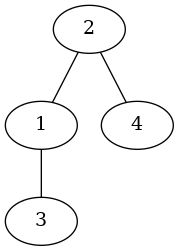

In [7]:
from IPython.display import Image

Image(DG.draw(format='png', prog='dot'))